In [1]:
import yaml
import matplotlib.pyplot as plt
import math

In [2]:
MET = "2"
with open("R_Wjets" + MET + ".txt", "r") as f:
    Wjets = yaml.load(f, Loader=yaml.SafeLoader)
with open("R_Zjets" + MET + ".txt", "r") as f:
    Zjets = yaml.load(f, Loader=yaml.SafeLoader)

In [3]:
regions = list(Wjets.keys())

# Confronto Wjets - Zjets

Text(0.5, 1.0, 'R_MC')

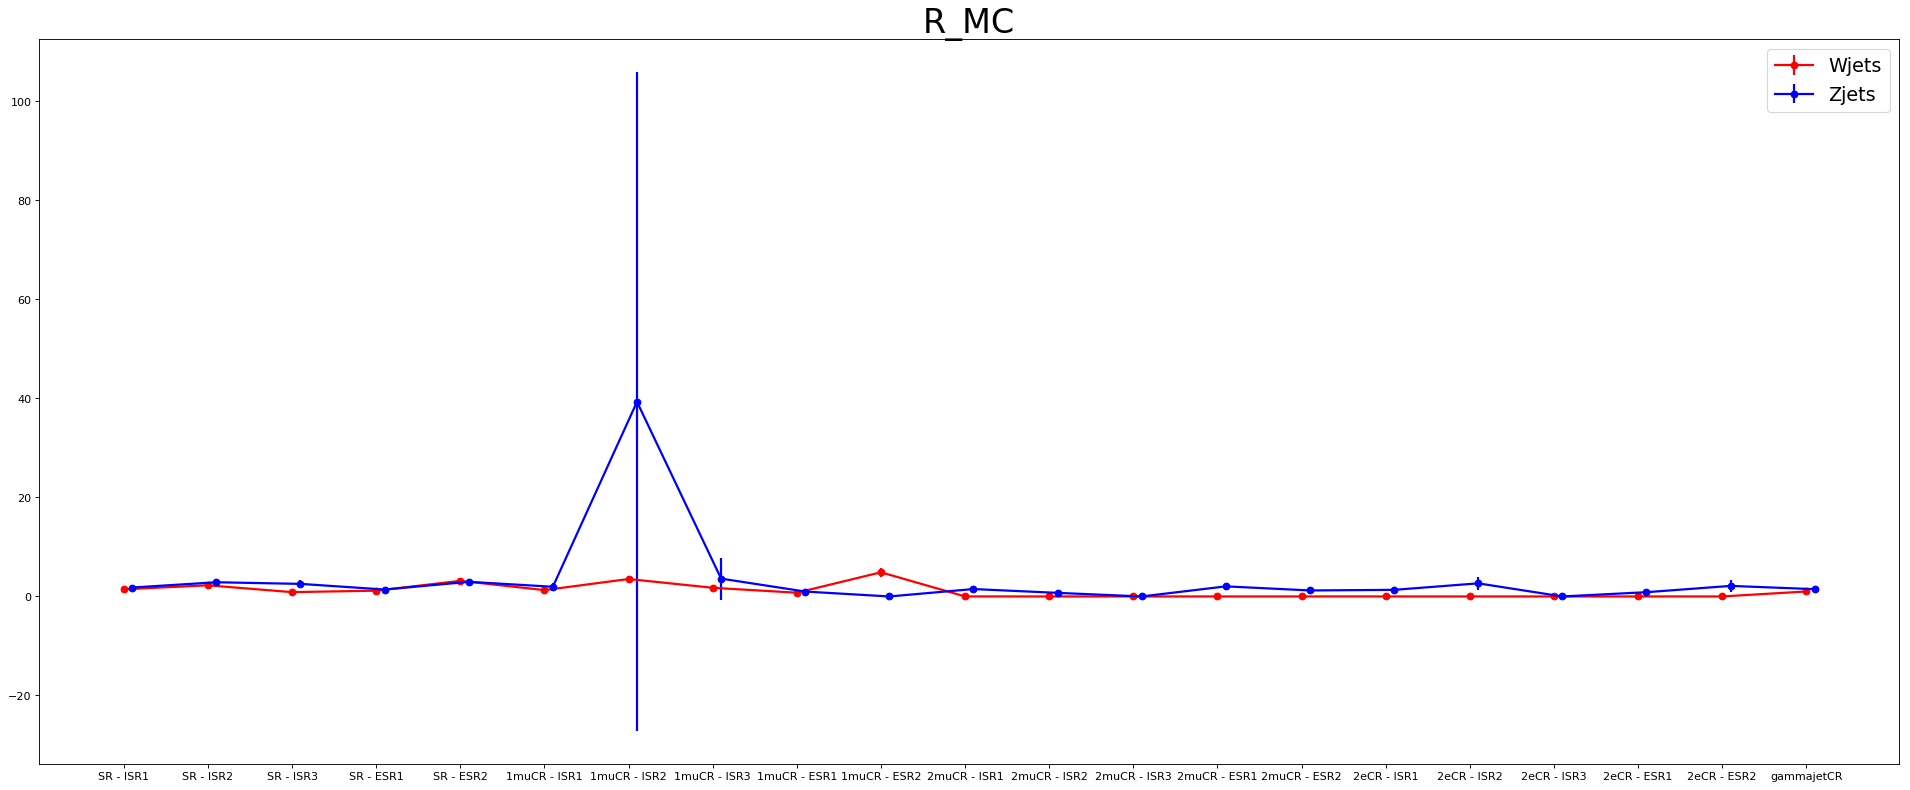

In [4]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

R_W = [ Wjets[region]["R_MC"] for region in regions ]
sigma_R_W = [ Wjets[region]["sigma_R_MC"] for region in regions ]
R_Z = [ Zjets[region]["R_MC"] for region in regions ]
sigma_R_Z = [ Zjets[region]["sigma_R_MC"] for region in regions ]


plt.errorbar([i for i in range(21)], R_W, yerr=sigma_R_W, fmt="or", linestyle="-", linewidth=2, label="Wjets")
plt.errorbar([i+0.1 for i in range(21)], R_Z, yerr=sigma_R_Z, fmt="ob", linestyle="-", linewidth=2, label="Zjets")




plt.xticks(range(len(regions)), regions)
plt.legend(fontsize="xx-large")
plt.title("R_MC", fontsize=30)

# Merge

In [5]:
# Wjets: SR + 1muCR
# Zjets: SR + 2muCR + 2eCR
# gammajetCR a parte

In [6]:
Na_W = [ Wjets[regions[i]]["Na"] + Wjets[regions[i+5]]["Na"] for i in range(5) ]
Nb_W = [ Wjets[regions[i]]["Nb"] + Wjets[regions[i+5]]["Nb"] for i in range(5) ]
Ma_W = [ Wjets[regions[i]]["Ma"] + Wjets[regions[i+5]]["Ma"] for i in range(5) ]
Mb_W = [ Wjets[regions[i]]["Mb"] + Wjets[regions[i+5]]["Mb"] for i in range(5) ]

Na_Z = [ Zjets[regions[i]]["Na"] + Zjets[regions[i+10]]["Na"] + Zjets[regions[i+15]]["Na"] for i in range(5) ]
Nb_Z = [ Zjets[regions[i]]["Nb"] + Zjets[regions[i+10]]["Nb"] + Zjets[regions[i+15]]["Nb"] for i in range(5) ]
Ma_Z = [ Zjets[regions[i]]["Ma"] + Zjets[regions[i+10]]["Ma"] + Zjets[regions[i+15]]["Ma"] for i in range(5) ]
Mb_Z = [ Zjets[regions[i]]["Mb"] + Zjets[regions[i+10]]["Mb"] + Zjets[regions[i+15]]["Mb"] for i in range(5) ]

[1.3475213774545347, 2.845800899885138, 1.4371566678513172, 0.9249651842459786, 3.6175749672830944]


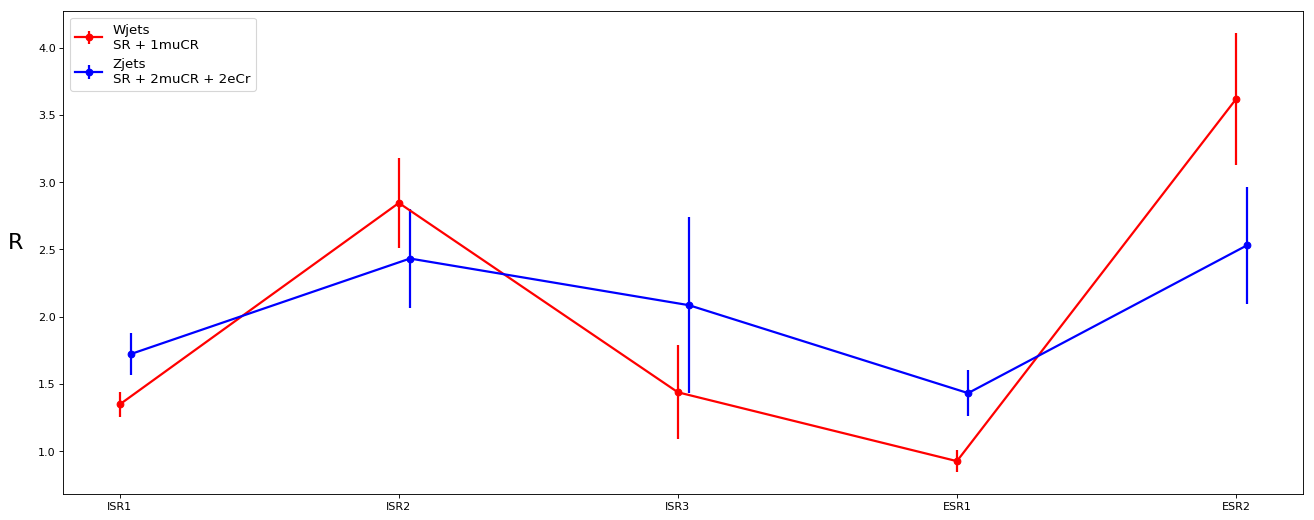

In [7]:
R_W = [0 for _ in range(5)]
sigma_R_W = [0 for _ in range(5)]

R_Z = [0 for _ in range(5)]
sigma_R_Z = [0 for _ in range(5)]


for i in range(5):
    if Na_W[i]>0 and Nb_W[i]>0 and Ma_W[i]>0 and Mb_W[i]>0:
        try:
            R_W[i] = (Na_W[i]*Mb_W[i])/(Nb_W[i]*Ma_W[i])
            sigma_R_W[i] = R_W[i] * math.sqrt((1/Na_W[i]) + (1/Nb_W[i]) + (1/Ma_W[i]) + (1/Mb_W[i]))
        except (ZeroDivisionError, ValueError):
            R_W[i] = 0
            sigma_R_W[i] = 0
    else:
        R_W[i] = 0
        sigma_R_W[i] = 0


for i in range(5):
    if Na_Z[i]>0 and Nb_Z[i]>0 and Ma_Z[i]>0 and Mb_Z[i]>0:
        try:
            R_Z[i] = (Na_Z[i]*Mb_Z[i])/(Nb_Z[i]*Ma_Z[i])
            sigma_R_Z[i] = R_Z[i] * math.sqrt((1/Na_Z[i]) + (1/Nb_Z[i]) + (1/Ma_Z[i]) + (1/Mb_Z[i]))
        except (ZeroDivisionError, ValueError):
            R_Z[i] = 0
            sigma_R_Z[i] = 0
    else:
        R_Z[i] = 0
        sigma_R_Z[i] = 0
        
        
plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar([i for i in range(5)], R_W, yerr=sigma_R_W, fmt="or", linestyle="-", linewidth=2, label="Wjets\nSR + 1muCR")
plt.errorbar([i+0.04 for i in range(5)], R_Z, yerr=sigma_R_Z, fmt="ob", linestyle="-", linewidth=2, label="Zjets\nSR + 2muCR + 2eCr")

plt.xticks(range(5), ["ISR1", "ISR2", "ISR3", "ESR1", "ESR2"])
plt.legend(loc=2, fontsize="large")
plt.ylabel("R     ", rotation=0, fontsize=20)

print(R_W)

## gammajetCR

(-0.1, 0.1)

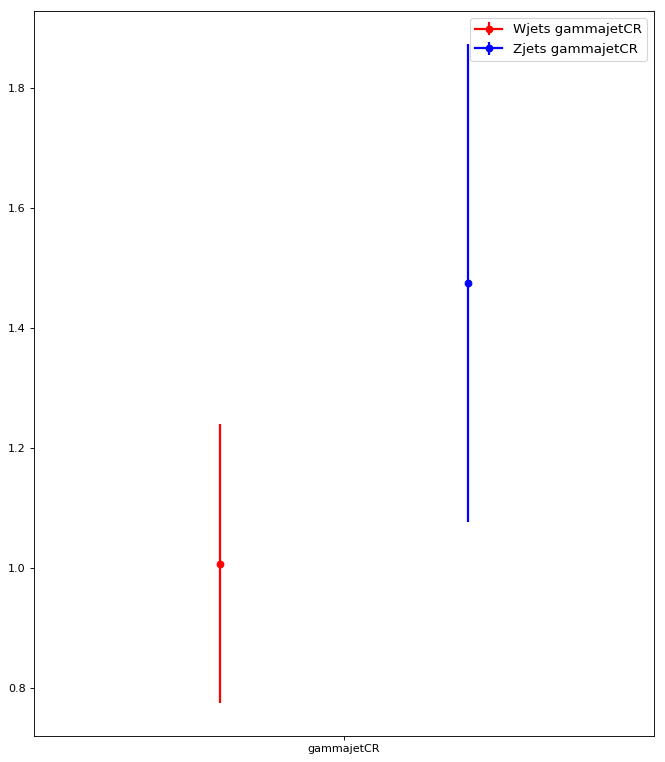

In [8]:

plt.figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar([-0.04], Wjets["gammajetCR"]["R_MC"], yerr=Wjets["gammajetCR"]["sigma_R_MC"], fmt="or", linestyle="-", linewidth=2, label="Wjets gammajetCR")
plt.errorbar([0.04], Zjets["gammajetCR"]["R_MC"], yerr=Zjets["gammajetCR"]["sigma_R_MC"], fmt="ob", linestyle="-", linewidth=2, label="Zjets gammajetCR")

plt.xticks([0], ["gammajetCR"])
plt.legend(fontsize="large")
#plt.title("R_MC gammajets", fontsize=30)
plt.xlim(-0.1, 0.1)

# Grafici presentazione

In [9]:
R_W.append(Wjets["gammajetCR"]["R_MC"])
sigma_R_W.append(Wjets["gammajetCR"]["sigma_R_MC"])
R_Z.append(Zjets["gammajetCR"]["R_MC"])
sigma_R_Z.append(Zjets["gammajetCR"]["sigma_R_MC"])
print(R_W)

[1.3475213774545347, 2.845800899885138, 1.4371566678513172, 0.9249651842459786, 3.6175749672830944, 1.0072536007473978]


(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 <a list of 9 Text yticklabel objects>)

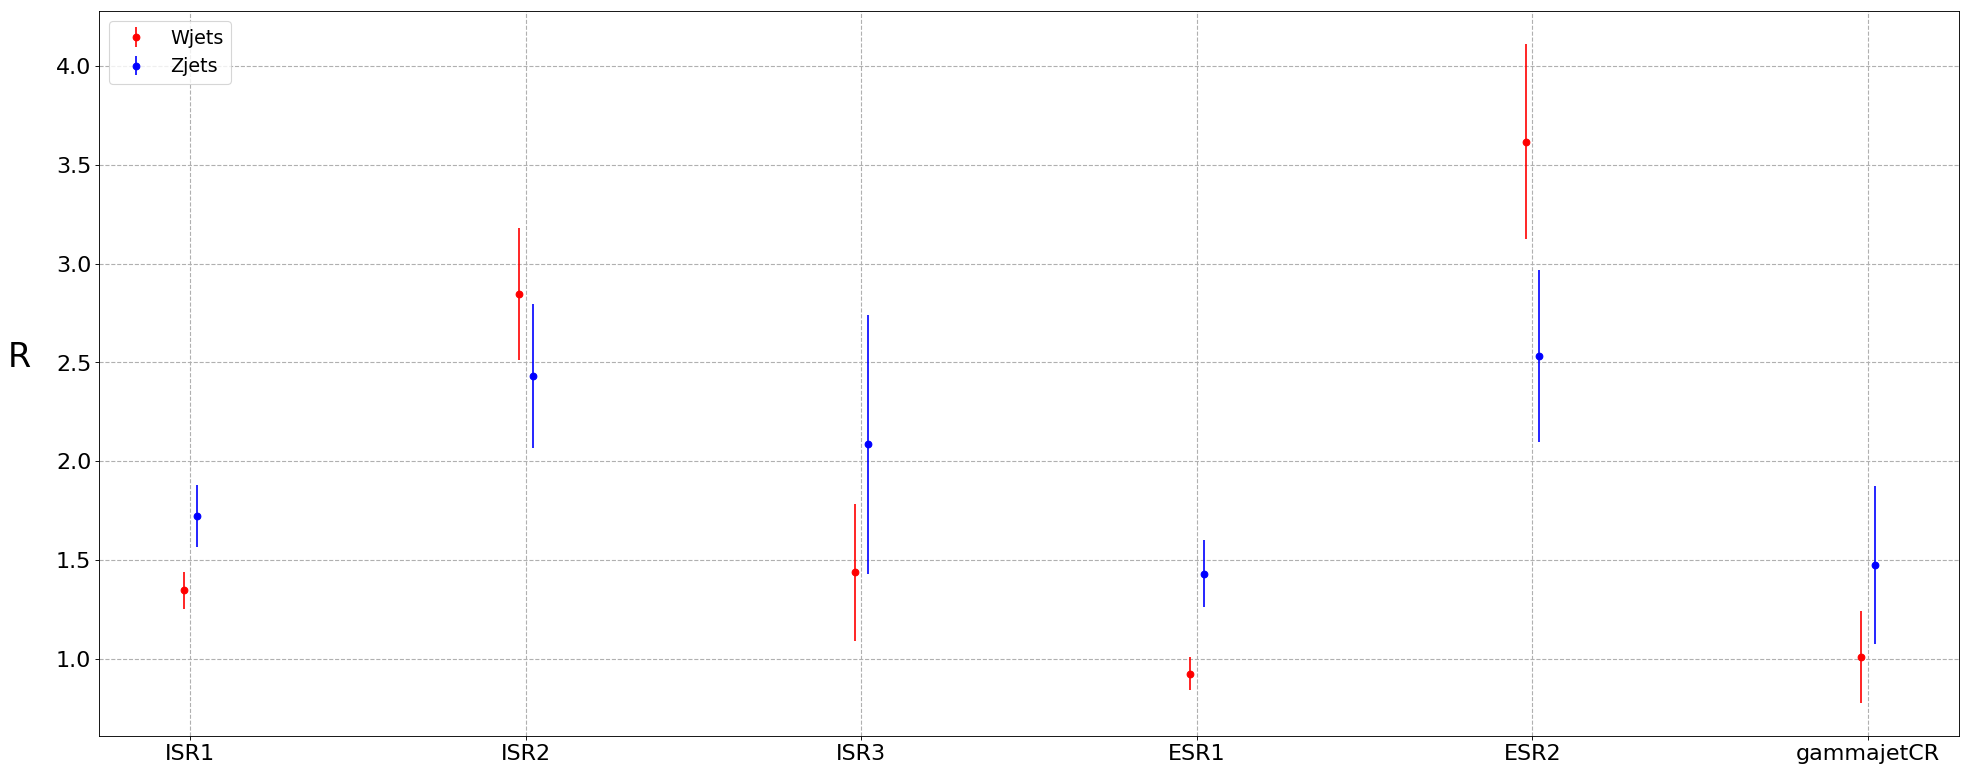

In [10]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar([i-0.02 for i in range(6)], R_W, yerr=sigma_R_W, fmt="or", linestyle="None", label="Wjets")
plt.errorbar([i+0.02 for i in range(6)], R_Z, yerr=sigma_R_Z, fmt="ob", linestyle="None", label="Zjets")

plt.xticks(range(6), ["ISR1", "ISR2", "ISR3", "ESR1", "ESR2", "gammajetCR"], fontsize=20)
plt.legend(loc=2, fontsize="xx-large")
plt.ylabel("R      ", rotation=0, fontsize=30)
plt.grid(linestyle="--", linewidth=1)
plt.yticks(fontsize=20)